In [142]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
os.chdir("C:\\Users\\Enes Teymir\\Desktop")

In [28]:
data=pd.read_excel('Athena_Sales.xlsx')

In [29]:
data.head()

,item_id,year,week,YearMonthDay,ItemSold
0,1025355,2021,1,2021-01-04,8
1,1025355,2021,1,2021-01-05,3
2,1025355,2021,1,2021-01-07,2
3,1025355,2021,1,2021-01-08,2
4,1025355,2021,1,2021-01-09,3


In [30]:
data.drop(['year','week'], inplace=True, axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   item_id       448 non-null    int64         
 1   YearMonthDay  448 non-null    datetime64[ns]
 2   ItemSold      448 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 10.6 KB


### Prediction With One Product

In [32]:
# Prophet time series = Trend + Seasonality + Holiday + error
# Input to Prophet is a dataframe with minimum two columns : ds and y.
# ds is datestamp column and should be as per pandas datatime format, YYYY-MM-DD or YYYY-MM-DD HH:MM:SS for a timestamp.
# y is the numeric column we want to predict or forecast.
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

C:\Program Files (x86)\ANACONDA\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


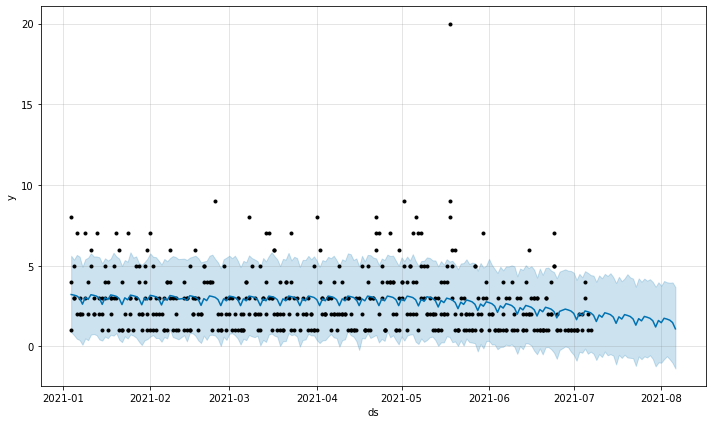

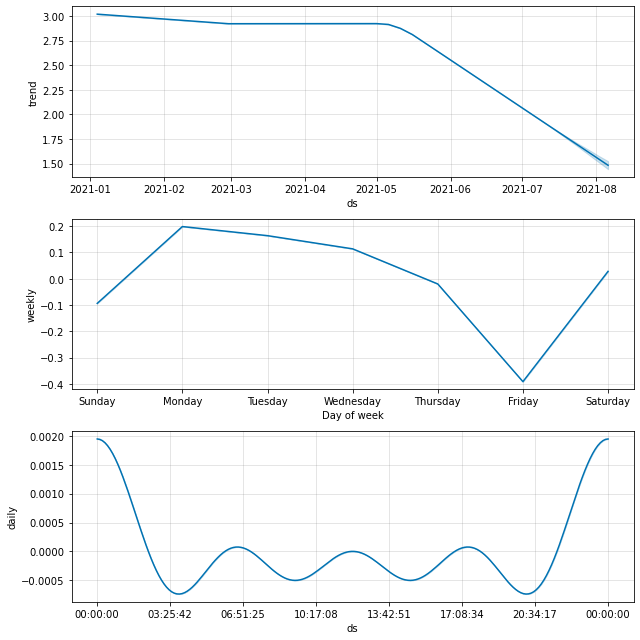

In [146]:
# try probhet for a sample product
# period = how many row will be added for prediction according to your frequency
# freq = 'D' : day, 'M' : monthy,  'MS' : first day of the month, 'H' : hour

data2=data[data['item_id']=='1025355']
data2 = data.rename(columns={'YearMonthDay': 'ds','ItemSold': 'y', 'item_id': 'item'})
model = Prophet(weekly_seasonality= True, daily_seasonality=True,seasonality_prior_scale=0.01).fit(data2)
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)
fig1 =model.plot(forecast) # Plotting the predicted data
fig2 = model.plot_components(forecast) # plot the trend and seasonality, components of the forecast

In [147]:
forecast[['ds','trend','yhat']]

,ds,trend,yhat
0,2021-01-04,3.018333,3.218854
1,2021-01-05,3.016570,3.182473
2,2021-01-06,3.014806,3.130564
3,2021-01-07,3.013043,2.995226
4,2021-01-08,3.011280,2.622006
...,...,...,...
208,2021-08-02,1.548771,1.749293
209,2021-08-03,1.532575,1.698478
210,2021-08-04,1.516378,1.632136
211,2021-08-05,1.500181,1.482364


### Predict For All Products

In [33]:
#creating the unique item list
columns =data['item_id'].unique().tolist()
columns

[1025355, 1025356, 1025357]

In [36]:
final_df=pd.DataFrame()  #creating a DF

for item_id in columns:
    
    df_item=data[data['item_id']==item_id]   # iterate for each item_id
    
    data2 = df_item
    data2 = data2.drop('item_id',1)
    data2 = data2.rename(columns={'YearMonthDay': 'ds','ItemSold': 'y'})
    model = Prophet().fit(data2)
    future = model.make_future_dataframe(periods=21)
    forecast = model.predict(future)
    forecast = forecast[['ds','yhat']].tail(20)  #take the only predicted days
    forecast.index=forecast['ds']
    forecast = forecast.drop('ds',1)   
    forecast = forecast.T                  #transpoze      
    forecast = forecast.reset_index()         
    forecast['Product']=item_id           #give the item column a name: Product     
    
    final_df=pd.concat([final_df,forecast])     #add the prediction df to final_df for each item_id 
final_df

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,index,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-10 00:00:00,2021-07-11 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,...,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-24 00:00:00,2021-07-25 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,Product,2021-07-28 00:00:00
0,yhat,1.760137,0.796869,2.150351,2.138573,2.543611,2.146721,1.928482,1.740549,0.777281,...,2.127133,1.908894,1.720962,0.757693,2.111176,2.099398,2.504436,2.107546,1025355,NaN
0,yhat,2.432496,1.942716,3.075729,2.475400,3.049196,2.727752,2.922067,2.409085,1.919305,...,2.704341,2.898656,2.385673,1.895893,3.028906,2.428577,3.002373,2.680929,1025356,NaN
0,yhat,NaN,2.425165,2.151221,2.154562,2.357597,2.902462,2.527553,2.842049,2.382100,...,2.859397,2.484488,2.798984,2.339035,2.065091,2.068432,2.271467,2.816332,1025357,2.441423


In [37]:
#drop the index column
final_df = final_df.drop('index',1)
final_df

,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-10 00:00:00,2021-07-11 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,2021-07-17 00:00:00,...,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-24 00:00:00,2021-07-25 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,Product,2021-07-28 00:00:00
0,1.760137,0.796869,2.150351,2.138573,2.543611,2.146721,1.928482,1.740549,0.777281,2.130763,...,2.127133,1.908894,1.720962,0.757693,2.111176,2.099398,2.504436,2.107546,1025355,NaN
0,2.432496,1.942716,3.075729,2.475400,3.049196,2.727752,2.922067,2.409085,1.919305,3.052317,...,2.704341,2.898656,2.385673,1.895893,3.028906,2.428577,3.002373,2.680929,1025356,NaN
0,NaN,2.425165,2.151221,2.154562,2.357597,2.902462,2.527553,2.842049,2.382100,2.108156,...,2.859397,2.484488,2.798984,2.339035,2.065091,2.068432,2.271467,2.816332,1025357,2.441423


In [173]:
# taking Product column into the first index
columnlist = final_df.columns.tolist()
columnlist.remove('Product')   
columnlist.insert(0,'Product') 
final_df2 = final_df[columnlist]
final_df2

,Product,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-10 00:00:00,2021-07-11 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,...,2021-07-19 00:00:00,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-24 00:00:00,2021-07-25 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,2021-07-28 00:00:00
0,1025355,1.760137,0.796869,2.150351,2.138573,2.543611,2.146721,1.928482,1.740549,0.777281,...,2.524024,2.127133,1.908894,1.720962,0.757693,2.111176,2.099398,2.504436,2.107546,NaN
0,1025356,2.432496,1.942716,3.075729,2.475400,3.049196,2.727752,2.922067,2.409085,1.919305,...,3.025784,2.704341,2.898656,2.385673,1.895893,3.028906,2.428577,3.002373,2.680929,NaN
0,1025357,NaN,2.425165,2.151221,2.154562,2.357597,2.902462,2.527553,2.842049,2.382100,...,2.314532,2.859397,2.484488,2.798984,2.339035,2.065091,2.068432,2.271467,2.816332,2.441423


In [174]:
final_df2.index = np.arange(len(final_df2))
final_df2

,Product,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-10 00:00:00,2021-07-11 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,...,2021-07-19 00:00:00,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-24 00:00:00,2021-07-25 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,2021-07-28 00:00:00
0,1025355,1.760137,0.796869,2.150351,2.138573,2.543611,2.146721,1.928482,1.740549,0.777281,...,2.524024,2.127133,1.908894,1.720962,0.757693,2.111176,2.099398,2.504436,2.107546,NaN
1,1025356,2.432496,1.942716,3.075729,2.475400,3.049196,2.727752,2.922067,2.409085,1.919305,...,3.025784,2.704341,2.898656,2.385673,1.895893,3.028906,2.428577,3.002373,2.680929,NaN
2,1025357,NaN,2.425165,2.151221,2.154562,2.357597,2.902462,2.527553,2.842049,2.382100,...,2.314532,2.859397,2.484488,2.798984,2.339035,2.065091,2.068432,2.271467,2.816332,2.441423


In [179]:
m = final_df2.iloc[:,1:].mean(axis=1)
for i, col in enumerate(final_df2):
    final_df2.iloc[:, i] = final_df2.iloc[:,i].fillna(m)

final_df2    

,Product,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-10 00:00:00,2021-07-11 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,...,2021-07-19 00:00:00,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-24 00:00:00,2021-07-25 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,2021-07-28 00:00:00
0,1025355,1.760137,0.796869,2.150351,2.138573,2.543611,2.146721,1.928482,1.740549,0.777281,...,2.524024,2.127133,1.908894,1.720962,0.757693,2.111176,2.099398,2.504436,2.107546,1.904679
1,1025356,2.432496,1.942716,3.075729,2.475400,3.049196,2.727752,2.922067,2.409085,1.919305,...,3.025784,2.704341,2.898656,2.385673,1.895893,3.028906,2.428577,3.002373,2.680929,2.625459
2,1025357,2.421077,2.425165,2.151221,2.154562,2.357597,2.902462,2.527553,2.842049,2.382100,...,2.314532,2.859397,2.484488,2.798984,2.339035,2.065091,2.068432,2.271467,2.816332,2.441423


In [181]:
# make output more wide to see all columns
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)
final_df2

,Product,2021-07-08 00:00:00,2021-07-09 00:00:00,2021-07-10 00:00:00,2021-07-11 00:00:00,2021-07-12 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-15 00:00:00,2021-07-16 00:00:00,2021-07-17 00:00:00,2021-07-18 00:00:00,2021-07-19 00:00:00,2021-07-20 00:00:00,2021-07-21 00:00:00,2021-07-22 00:00:00,2021-07-23 00:00:00,2021-07-24 00:00:00,2021-07-25 00:00:00,2021-07-26 00:00:00,2021-07-27 00:00:00,2021-07-28 00:00:00
0,1025355,1.760137,0.796869,2.150351,2.138573,2.543611,2.146721,1.928482,1.740549,0.777281,2.130763,2.118985,2.524024,2.127133,1.908894,1.720962,0.757693,2.111176,2.099398,2.504436,2.107546,1.904679
1,1025356,2.432496,1.942716,3.075729,2.475400,3.049196,2.727752,2.922067,2.409085,1.919305,3.052317,2.451989,3.025784,2.704341,2.898656,2.385673,1.895893,3.028906,2.428577,3.002373,2.680929,2.625459
2,1025357,2.421077,2.425165,2.151221,2.154562,2.357597,2.902462,2.527553,2.842049,2.382100,2.108156,2.111497,2.314532,2.859397,2.484488,2.798984,2.339035,2.065091,2.068432,2.271467,2.816332,2.441423


In [182]:
# remove the timestamp section from date columns
new_columns = []
for i in final_df2.columns.tolist():
    try:
        i = str(i).split(' ')[0] # sütundaki date timestamp olanlarda ilk boşluktan itibaren ayırıyoruz. İndex 0 olanı alıyor
    except:
        pass  # product sütununu etmeye calısırken hata alcak gec demek
    
    new_columns.append(i)

final_df2.columns = new_columns
final_df2

,Product,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26,2021-07-27,2021-07-28
0,1025355,1.760137,0.796869,2.150351,2.138573,2.543611,2.146721,1.928482,1.740549,0.777281,2.130763,2.118985,2.524024,2.127133,1.908894,1.720962,0.757693,2.111176,2.099398,2.504436,2.107546,1.904679
1,1025356,2.432496,1.942716,3.075729,2.475400,3.049196,2.727752,2.922067,2.409085,1.919305,3.052317,2.451989,3.025784,2.704341,2.898656,2.385673,1.895893,3.028906,2.428577,3.002373,2.680929,2.625459
2,1025357,2.421077,2.425165,2.151221,2.154562,2.357597,2.902462,2.527553,2.842049,2.382100,2.108156,2.111497,2.314532,2.859397,2.484488,2.798984,2.339035,2.065091,2.068432,2.271467,2.816332,2.441423
